In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# data = pd.read_csv('../sql/K6_UNEMPLOYED_RESIDENTS_BY_MARITAL_STATUS_AND_SEX.csv')
data = pd.read_csv('../sql/K15T_UNEMPLOYED_RESIDENTS_BY_PREVIOUS_OCCUPATION_AND_SEX.csv')

In [46]:
data.nunique()

# Drop columns with only 1 unique value
col_only_single_unique = [col for col in data.columns if data[col].nunique()==1]
data.drop(col_only_single_unique, axis =1, inplace = True)
data.head()

,Occupation,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Gender
0,Managers & Administrators (Including Working P...,6.1,5.6,7.4,6.7,6.0,5.5,5.3,7.2,6.4,3.5,7.4,Male
1,Professionals,4.9,5.2,6.7,6.1,7.6,5.8,10.3,10.7,9.4,9.6,7.9,Male
2,Associate Professionals & Technicians,6.3,7.5,7.2,7.7,7.2,8.7,11.3,9.8,6.2,7.2,8.8,Male
3,Clerical Support Workers,4.3,4.5,4.5,4.7,3.7,4.8,5.0,4.6,3.5,3.0,3.1,Male
4,Service & Sales Workers,6.5,7.4,5.9,7.8,5.8,7.4,8.2,7.0,5.4,4.2,4.5,Male


In [47]:
## Convert to long form

cat_list = [col for col in data.columns if data[col].dtype == object]

df_long = data.melt(
    id_vars=cat_list,
    value_vars=[str(year) for year in range(2014, 2025)],
    var_name="Year",
    value_name="Count"
)
df_long.head()

,Occupation,Gender,Year,Count
0,Managers & Administrators (Including Working P...,Male,2014,6.1
1,Professionals,Male,2014,4.9
2,Associate Professionals & Technicians,Male,2014,6.3
3,Clerical Support Workers,Male,2014,4.3
4,Service & Sales Workers,Male,2014,6.5


In [48]:
df_long.nunique()

Occupation    10
Gender         3
Year          11
Count         99
dtype: int64

In [49]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Occupation  209 non-null    object 
 1   Gender      209 non-null    object 
 2   Year        209 non-null    object 
 3   Count       203 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.7+ KB


### Univariate Analysis (Single Variable)

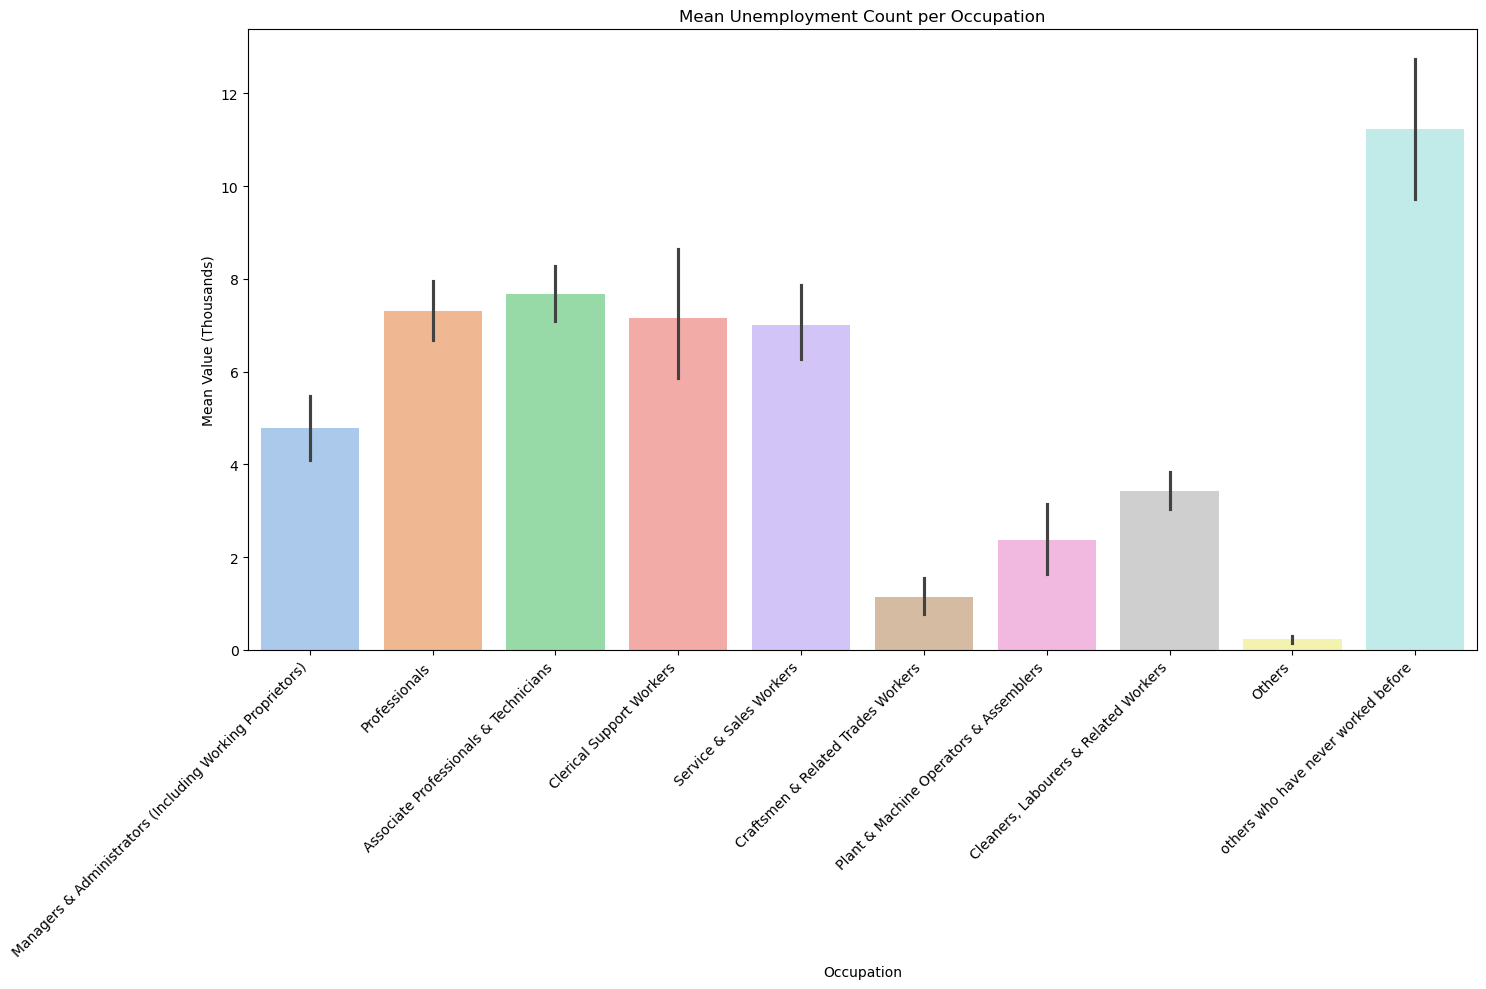

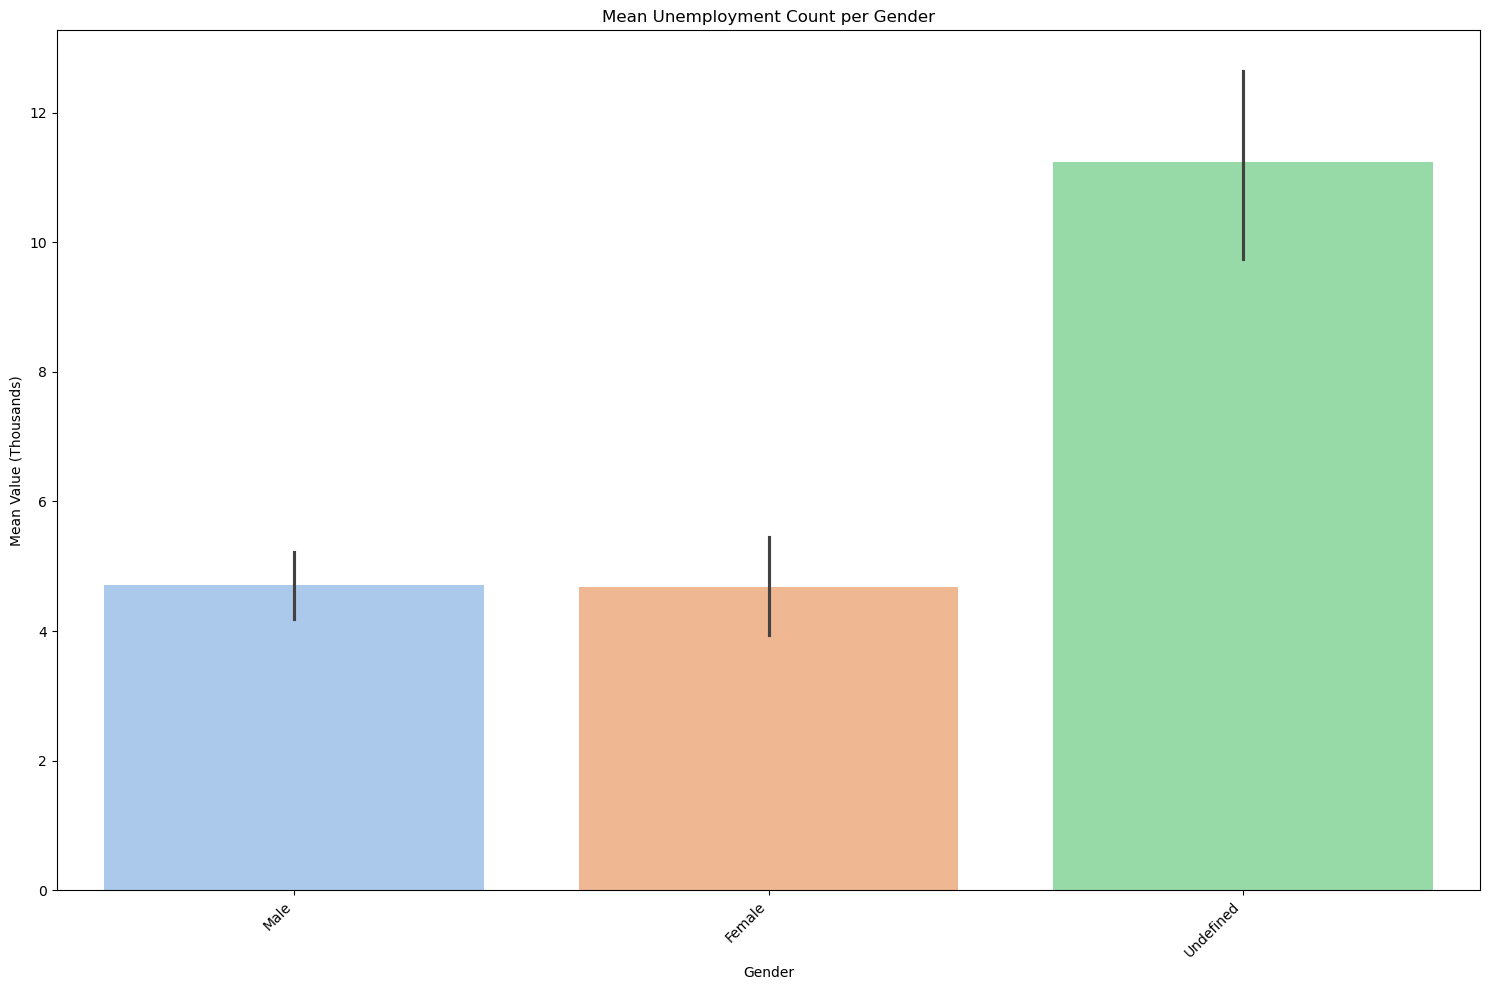

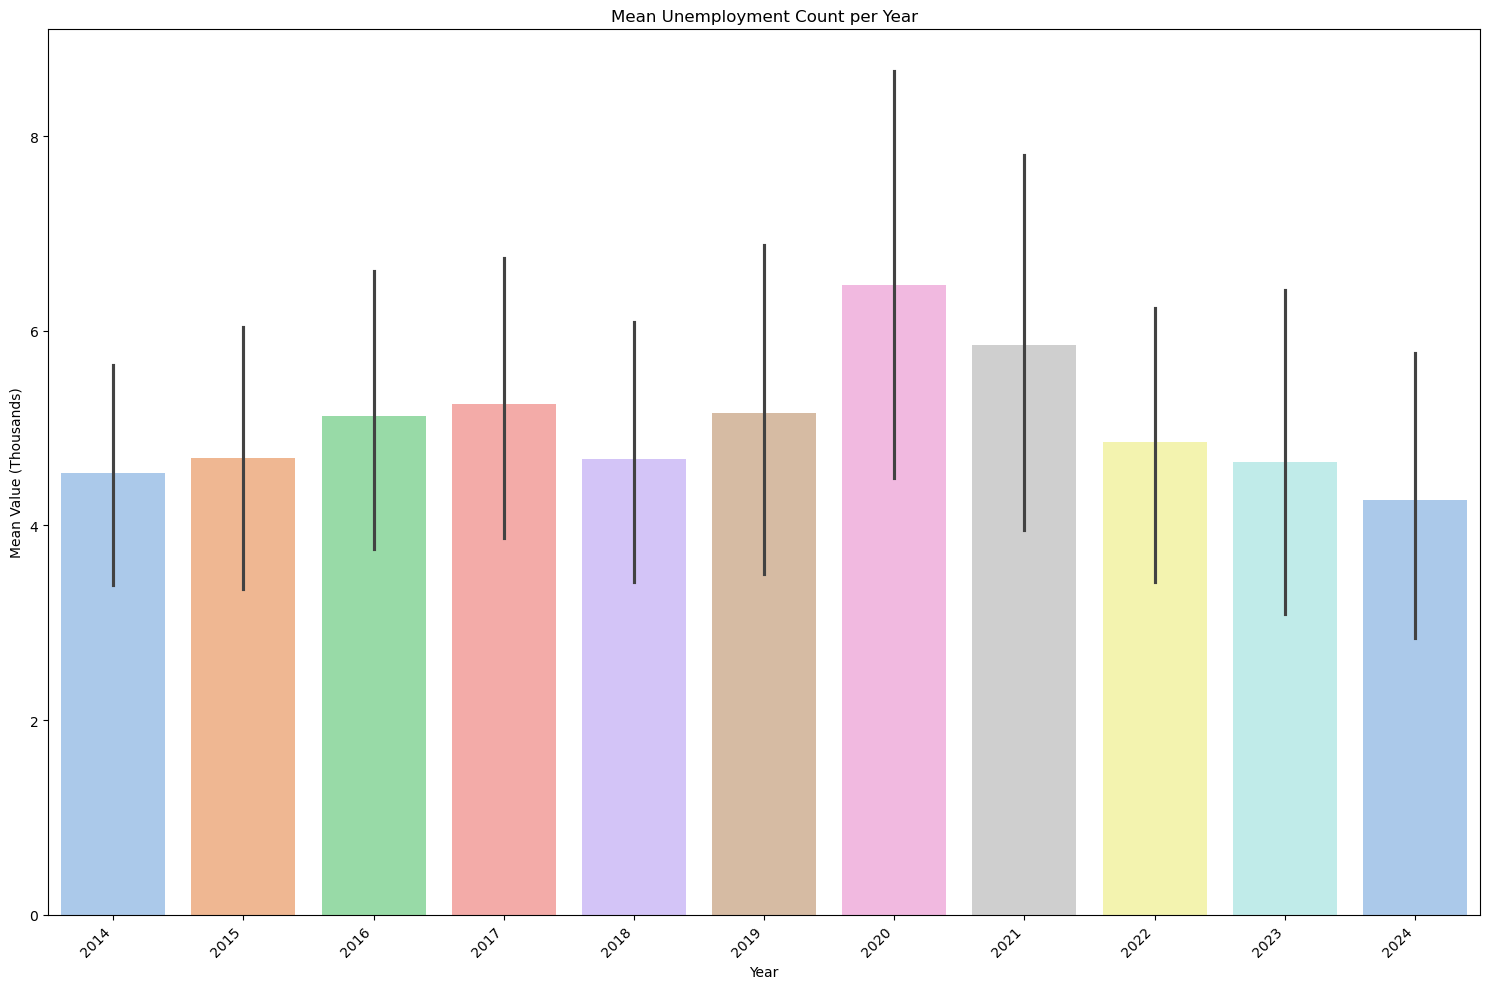

In [50]:

var_list = cat_list + ['Year']

for col in var_list:
    # y-axis to be Count

    ###-------------------------------------------------------------------####
    ### ---- Bar Plot – For categorical variables (mean of numerical) --- ####
    ###-------------------------------------------------------------------####
    plt.figure(figsize=(15, 10))
    sns.barplot(x=col, y='Count', hue=col, data=df_long, estimator='mean', palette='pastel' , legend=False)
    plt.title(f"Mean Unemployment Count per {col}")
    plt.xlabel(col) 
    plt.ylabel("Mean Value (Thousands)")

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()
    plt.show()


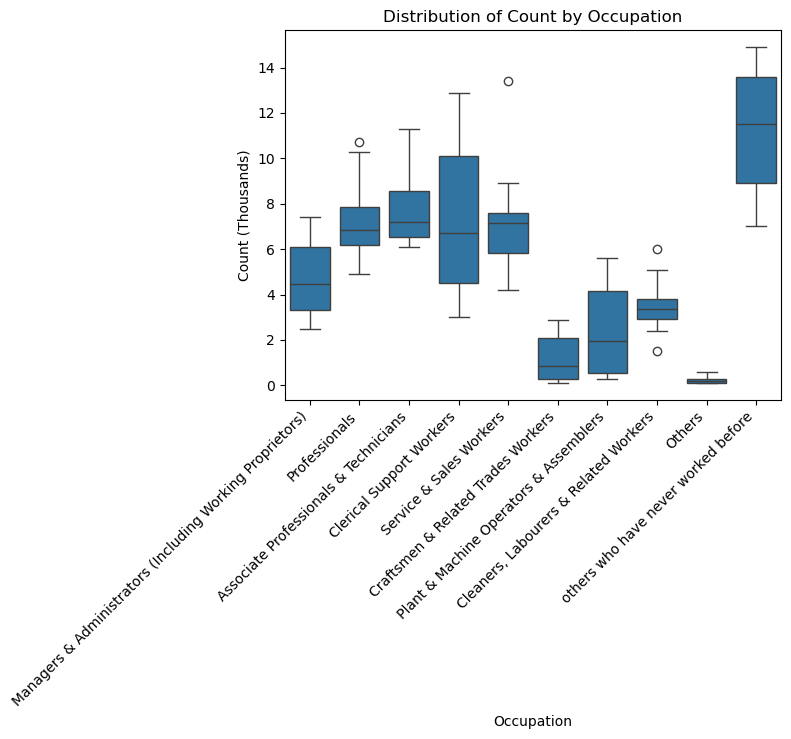

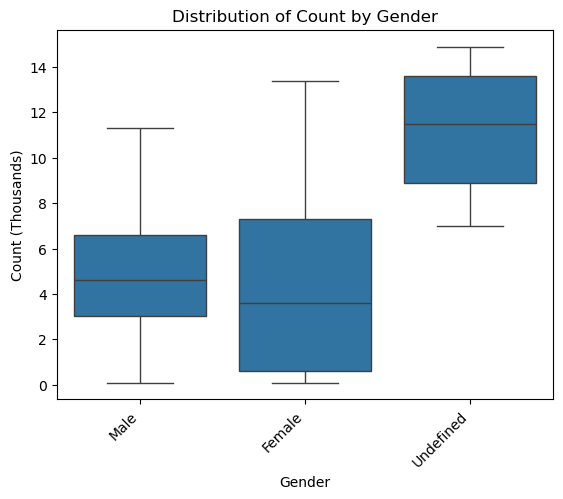

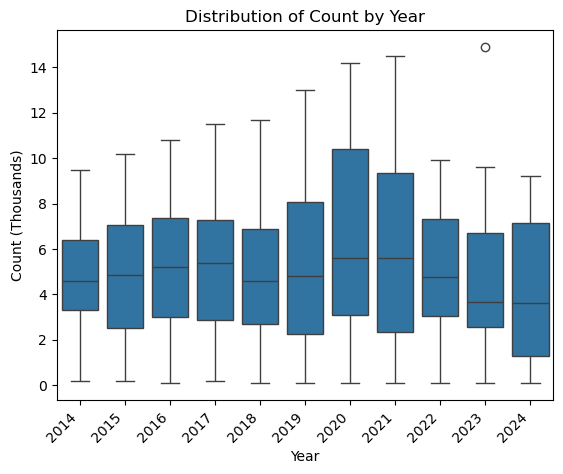

In [55]:
# Groupby

for col in var_list:
    df_grouped = df_long.groupby(col, as_index=False)['Count'].mean()

    # Boxplot to visualize distribution of Count by Col
    sns.boxplot(x=col, y='Count', data=df_long)
    plt.title(f'Distribution of Count by {col}')
    plt.xlabel(col)
    plt.ylabel('Count (Thousands)')
    plt.xticks(rotation=45, ha='right')  
    plt.show()

    # Or Barplot (mean Count by Col)
    # sns.barplot(x=col, y='Count', data=df_grouped)
    # plt.title(f'Average Count by {col}')
    # plt.xlabel(col)
    # plt.ylabel('Average Count (Thousands)')
    # plt.show()


### Bivariate Analysis (Two Variables)

In [52]:
df_long.nunique()

Occupation    10
Gender         3
Year          11
Count         99
dtype: int64

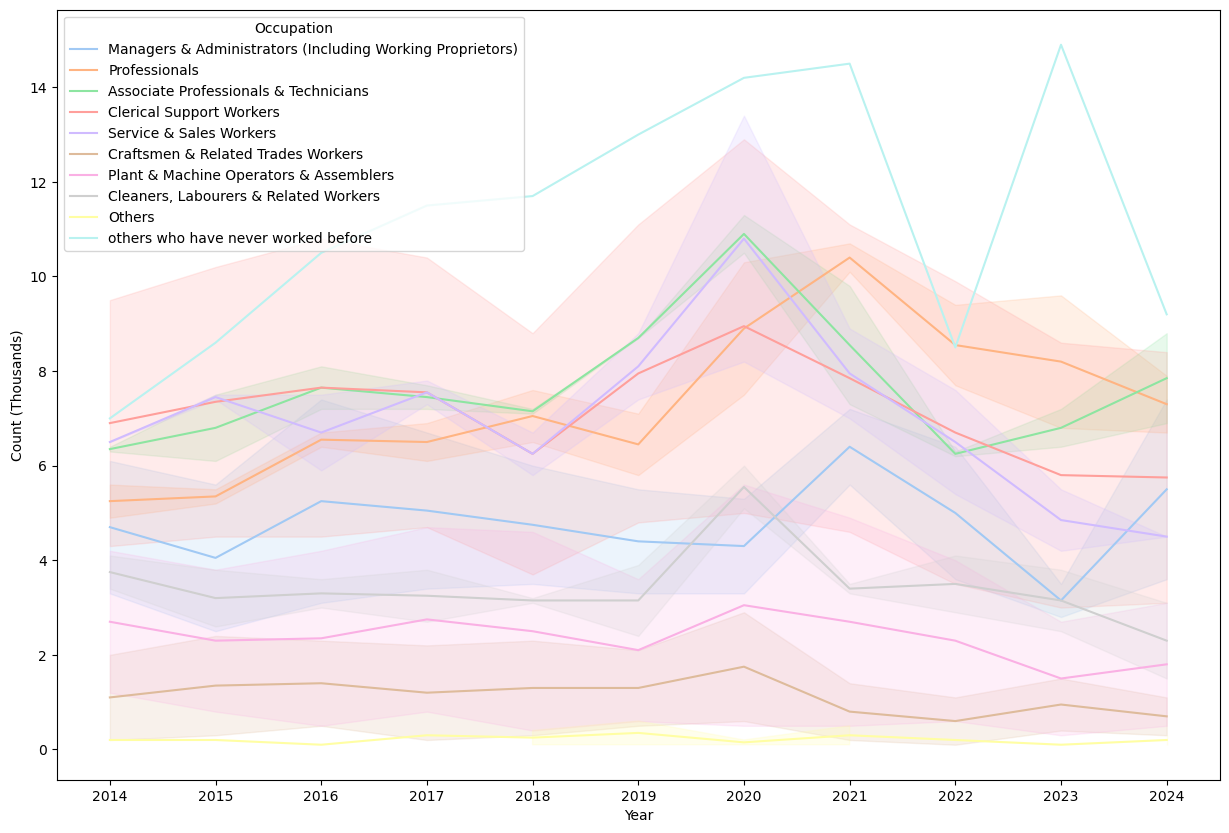

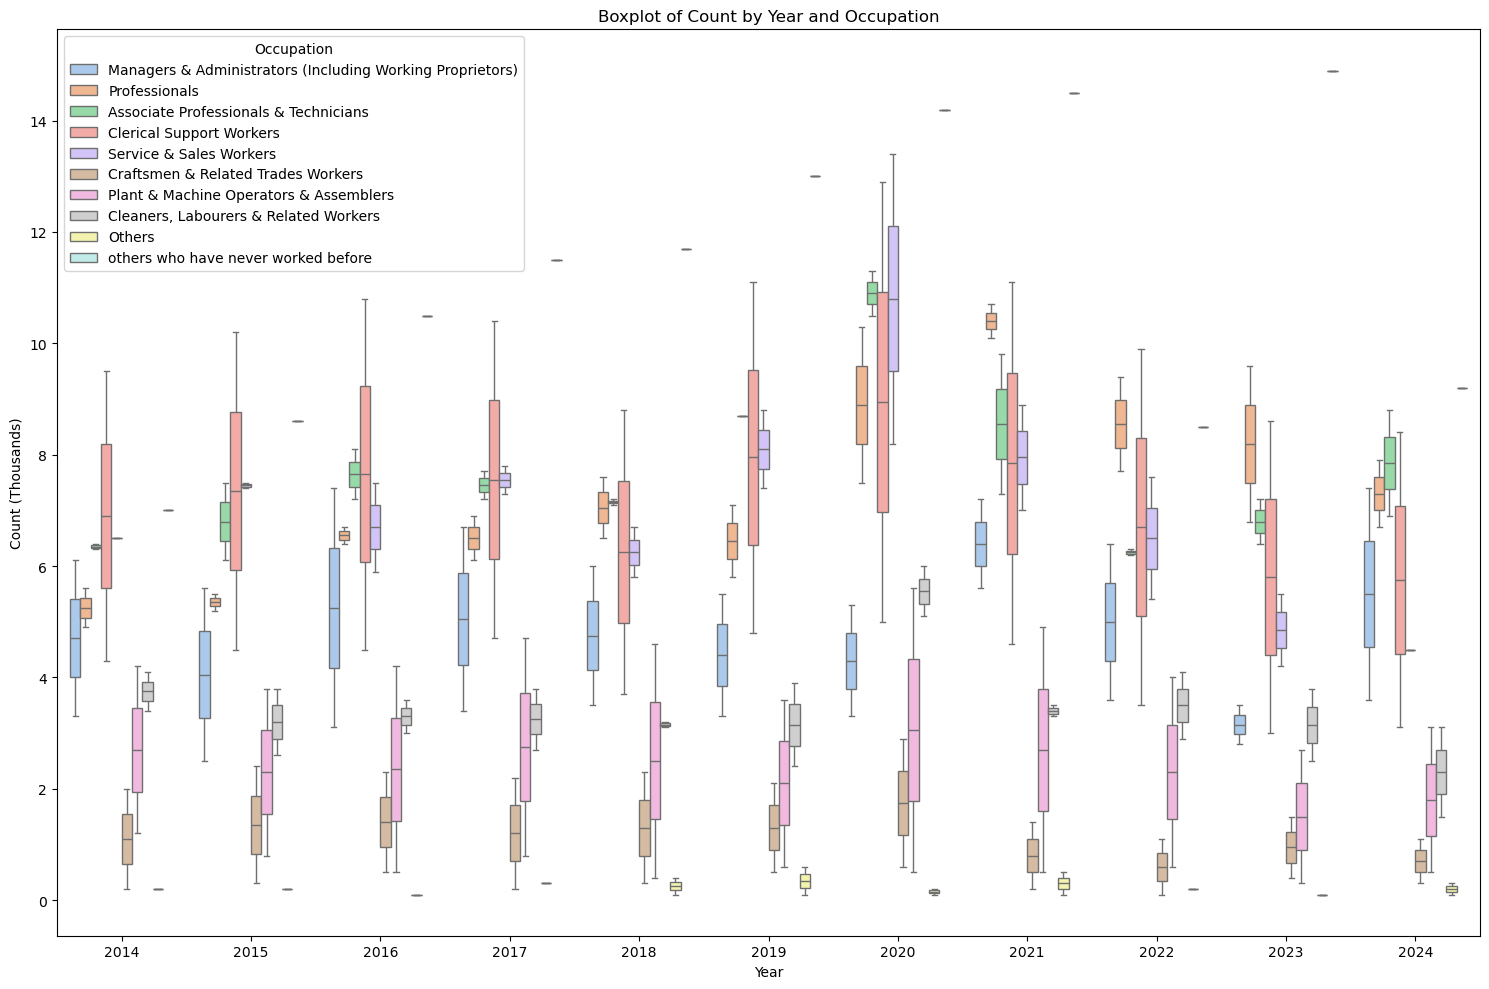

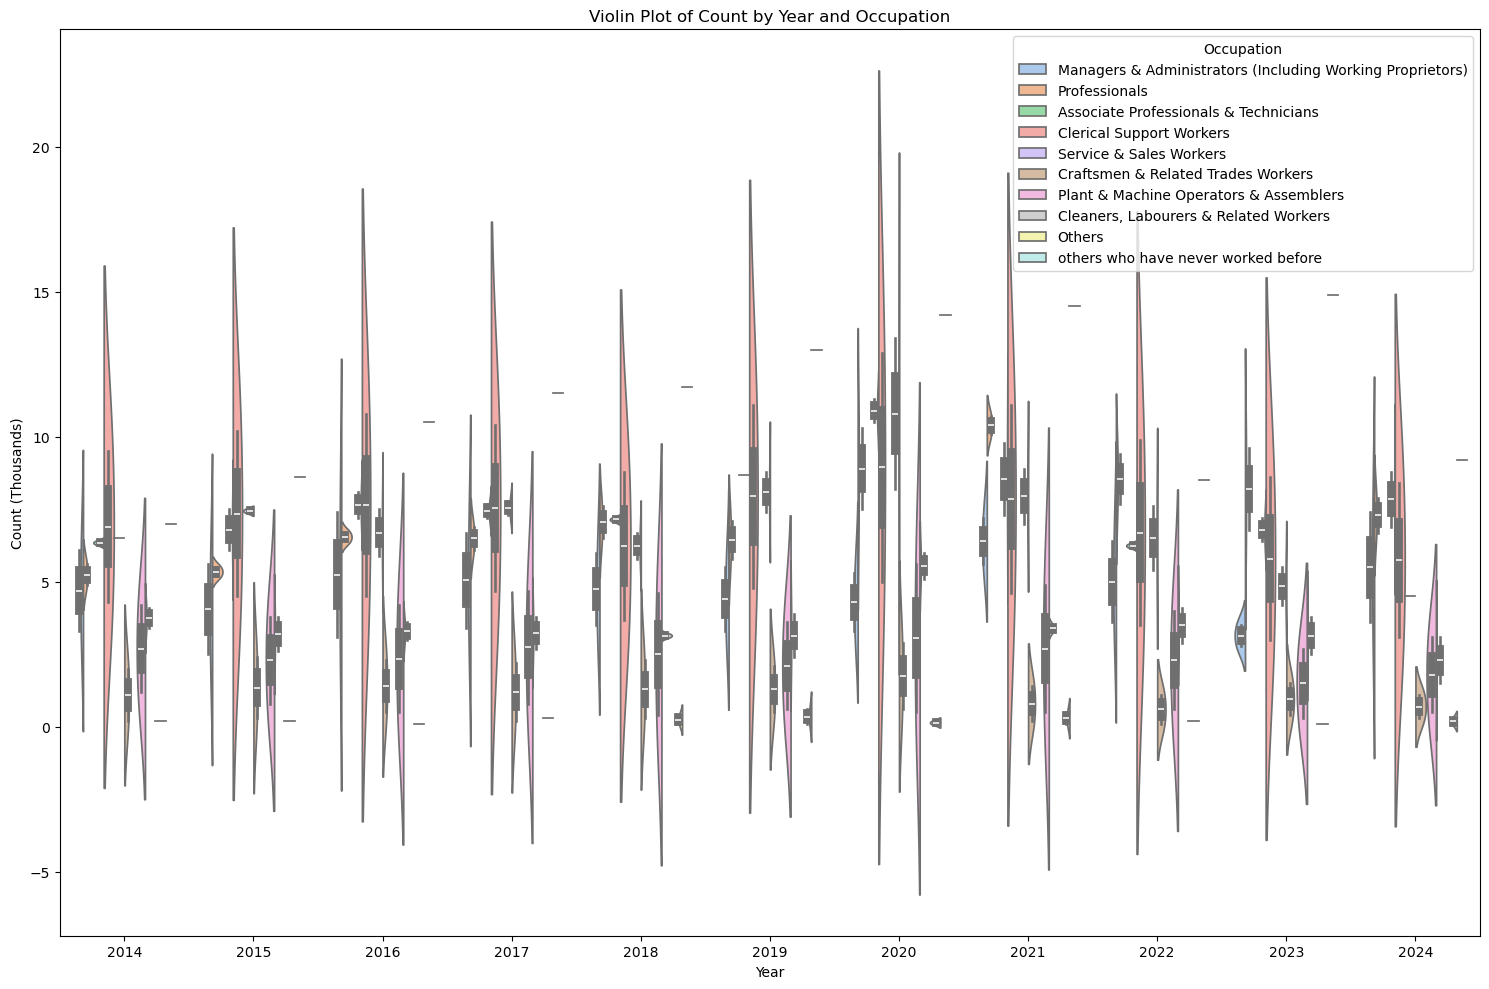

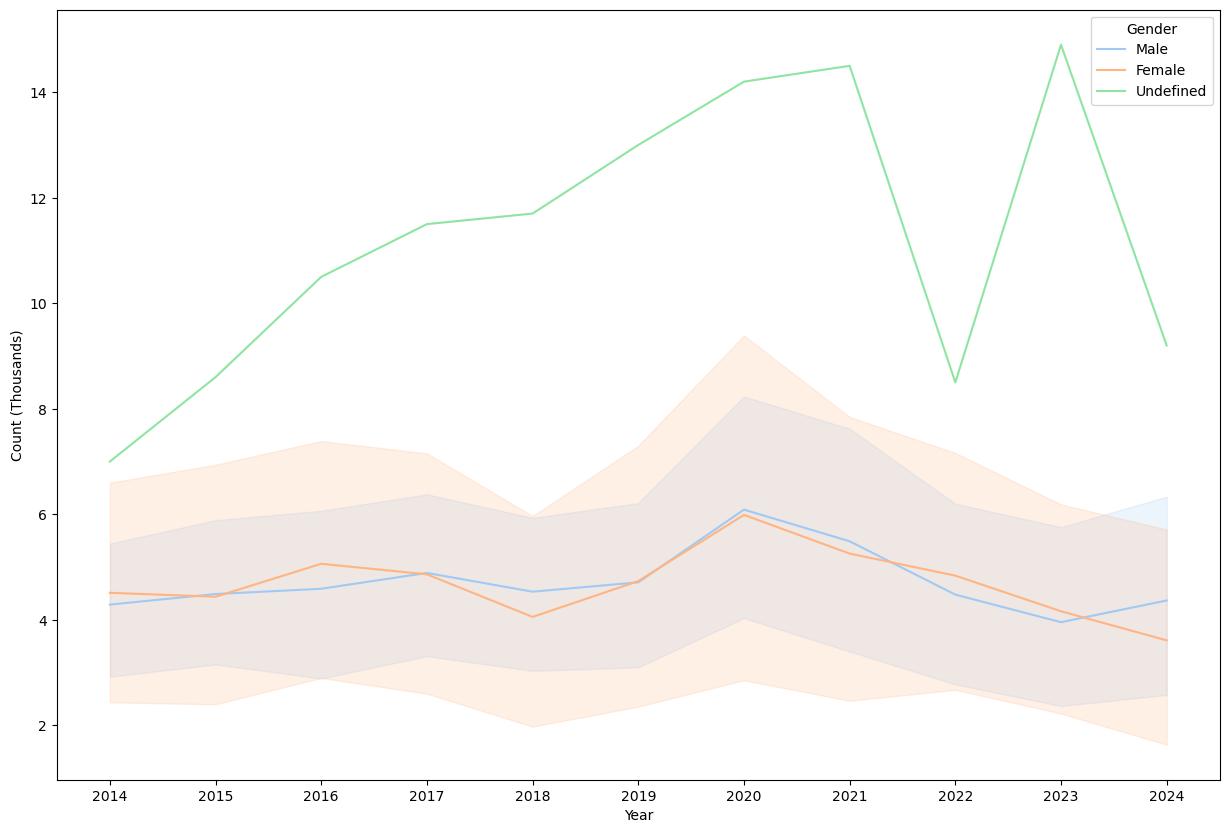

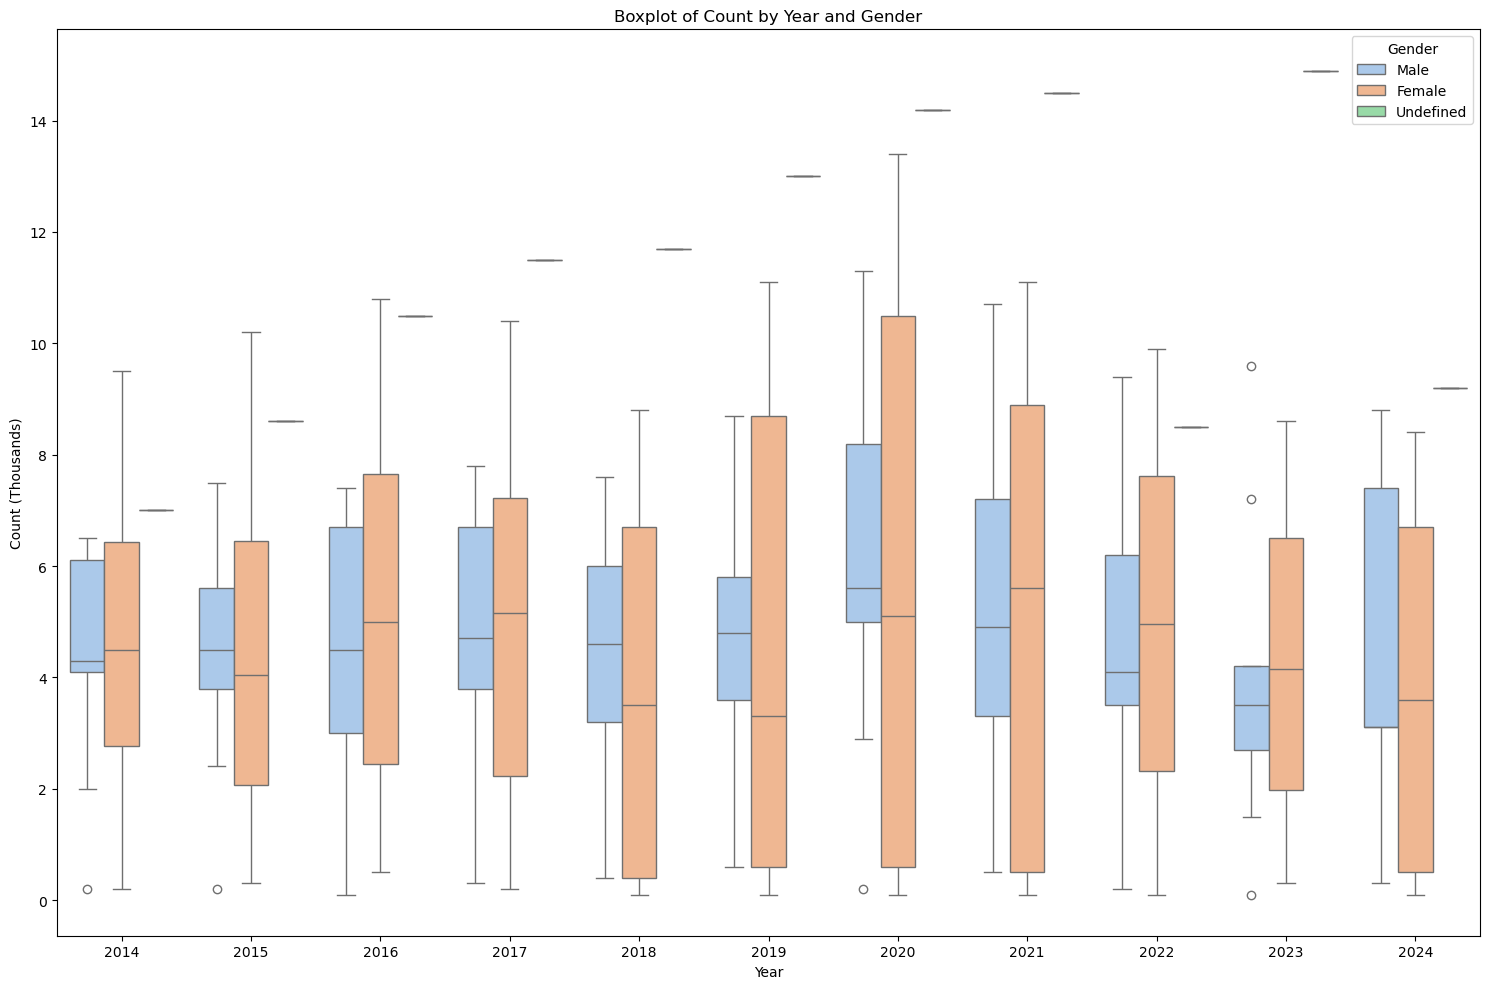

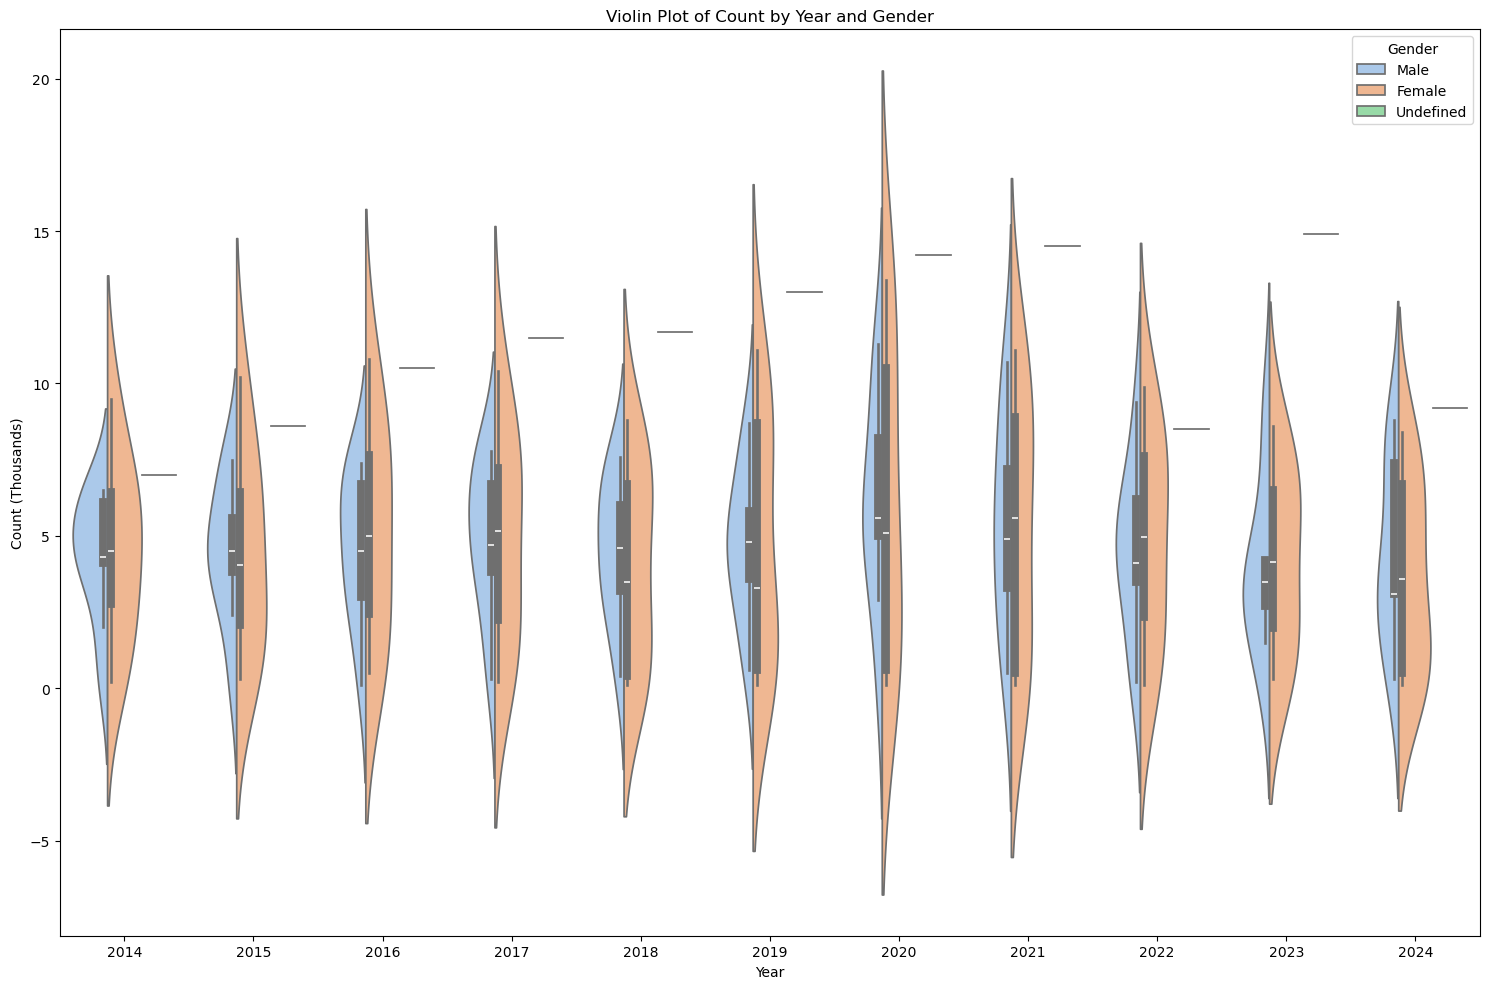

In [53]:
for i, col in enumerate(cat_list):
    # x-axis to be Year
    # y-axis to be Count

    ###---------------------------------------------------------------------------####
    ### ---- Line Plot – Shows mean trend over years for each category in col --- ####
    ###---------------------------------------------------------------------------####

    plt.figure(figsize=(15, 10))
    sns.lineplot(x='Year', y='Count', hue=col, data=df_long, palette='pastel', estimator='mean')
    plt.xlabel('Year')
    plt.ylabel("Count (Thousands)")
    plt.show()

    ###---------------------------------------------------------------------------####
    ### ---- Box Plot – Shows trend over years for each category in col --- ####
    ###---------------------------------------------------------------------------####
    plt.figure(figsize=(15, 10))
    sns.boxplot(x='Year', y='Count', hue=col, data=df_long, palette='pastel')
    plt.xlabel('Year')
    plt.ylabel('Count (Thousands)')
    plt.title(f'Boxplot of Count by Year and {col}')
    #plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
    plt.tight_layout()
    plt.show()


    ###---------------------------------------------------------------------------####
    ### ---- Violin Plot – Shows distribution over years for each category in col --- ####
    ###---------------------------------------------------------------------------####
    plt.figure(figsize=(15, 10))
    sns.violinplot(x='Year', y='Count', hue=col, data=df_long, palette='pastel', split=True)
    plt.xlabel('Year')
    plt.ylabel('Count (Thousands)')
    plt.title(f'Violin Plot of Count by Year and {col}')
    plt.tight_layout()
    plt.show()

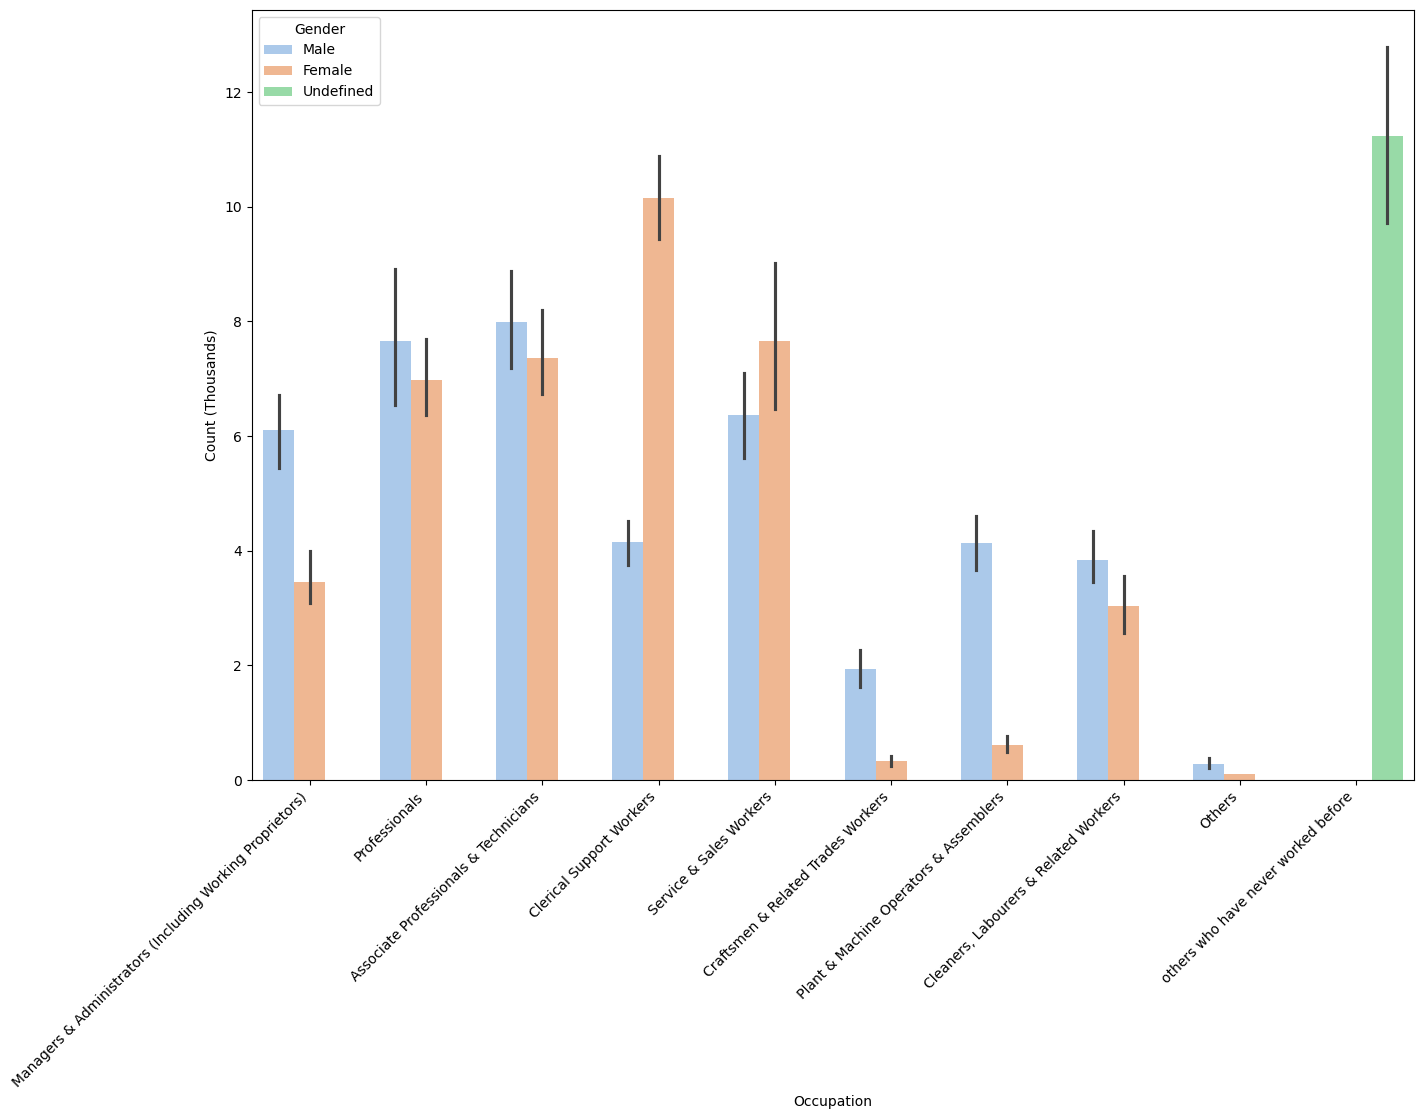

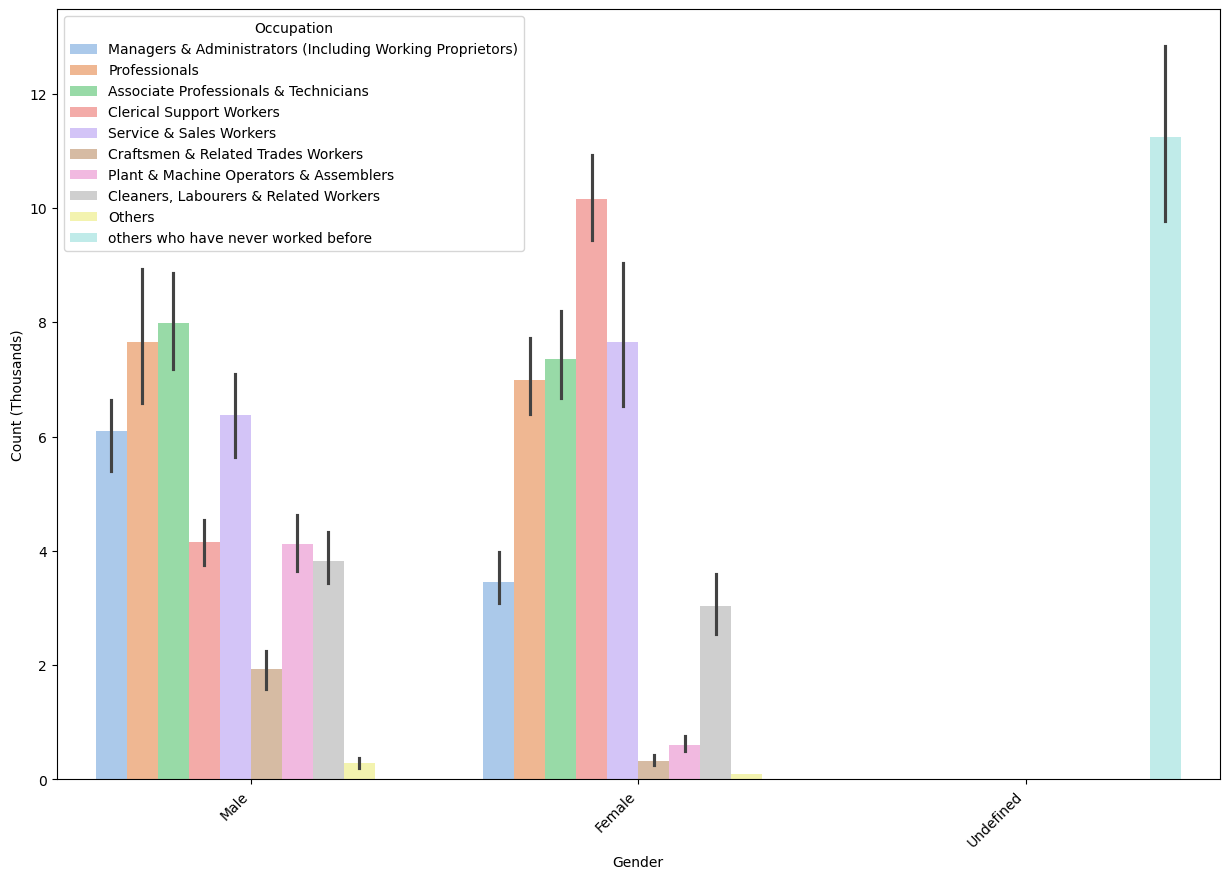

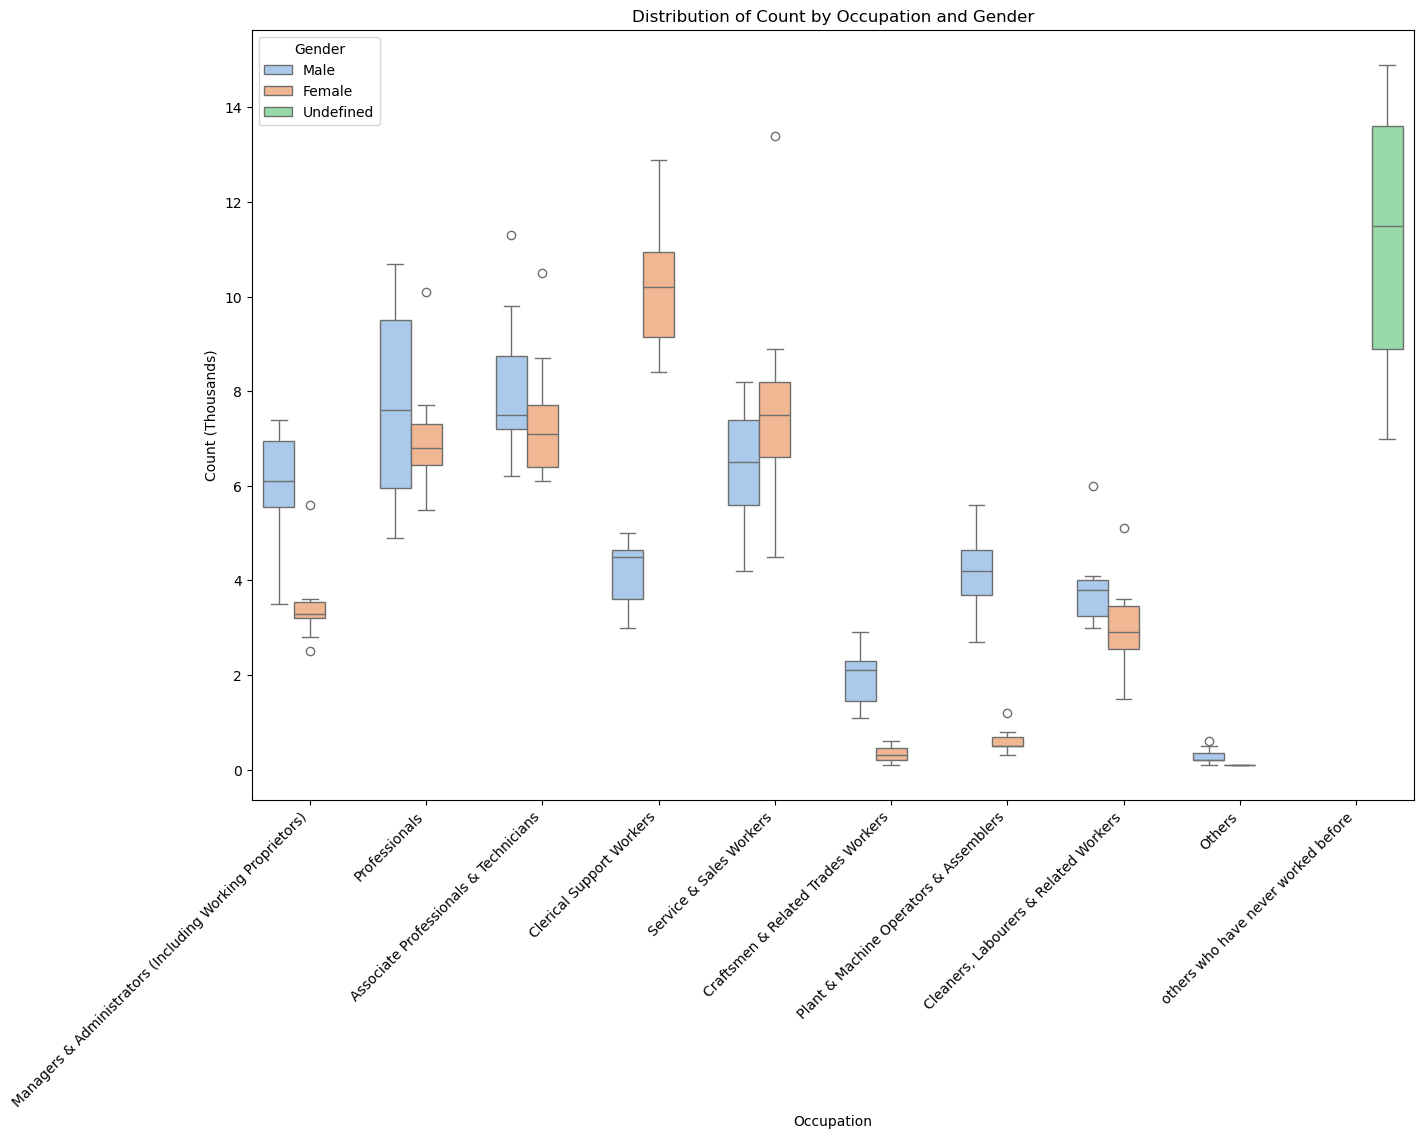

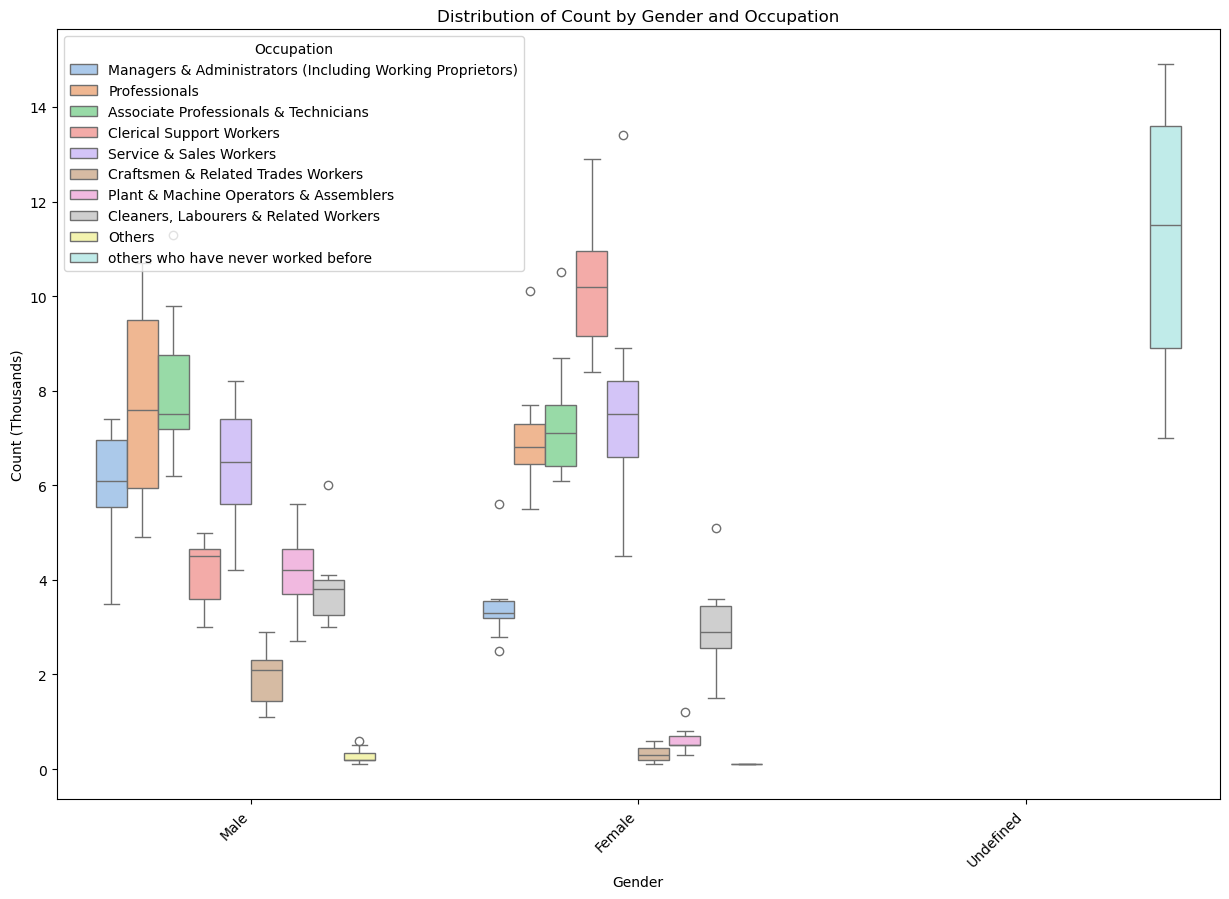

In [56]:
if len(cat_list)>1:
    combo_list = list(combinations(cat_list, 2))  
    # print(combo_list)


    for combo in combo_list:
        ###-----------------------------------------------------------------------------------------####
        ### ---- Bar Plots – Show mean count comparisons between pairs of categorical variables --- ####
        ###-----------------------------------------------------------------------------------------####

        plt.figure(figsize=(15, 10))
        sns.barplot(x=combo[0], y='Count', hue=combo[1], data=df_long, palette='pastel', estimator='mean')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(combo[0])
        plt.ylabel("Count (Thousands)")
        plt.show()

        plt.figure(figsize=(15, 10))
        sns.barplot(x=combo[1], y='Count', hue=combo[0], data=df_long, palette='pastel', estimator='mean')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(combo[1])
        plt.ylabel("Count (Thousands)")
        plt.show()

        ###-----------------------------------------------------------------------------------------####
        ### ---- Box Plot – Shows distribution of Count by the two columns --- ####
        ###-----------------------------------------------------------------------------------------####
    
        df_grouped = df_long.groupby([combo[0], combo[1]], as_index=False)['Count'].mean()
        
        plt.figure(figsize=(15, 10))
        sns.boxplot(x=combo[0], y='Count', hue=combo[1], data=df_long, palette='pastel')
        plt.title(f'Distribution of Count by {combo[0]} and {combo[1]}')
        plt.xlabel(combo[0])
        plt.ylabel('Count (Thousands)')
        plt.xticks(rotation=45, ha='right')  
        plt.show()

        plt.figure(figsize=(15, 10))
        sns.boxplot(x=combo[1], y='Count', hue=combo[0], data=df_long, palette='pastel')
        plt.title(f'Distribution of Count by {combo[1]} and {combo[0]}')
        plt.xlabel(combo[1])
        plt.ylabel('Count (Thousands)')
        plt.xticks(rotation=45, ha='right')  
        plt.show()


### Multivariate Analysis

['Occupation', 'Gender']


c:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


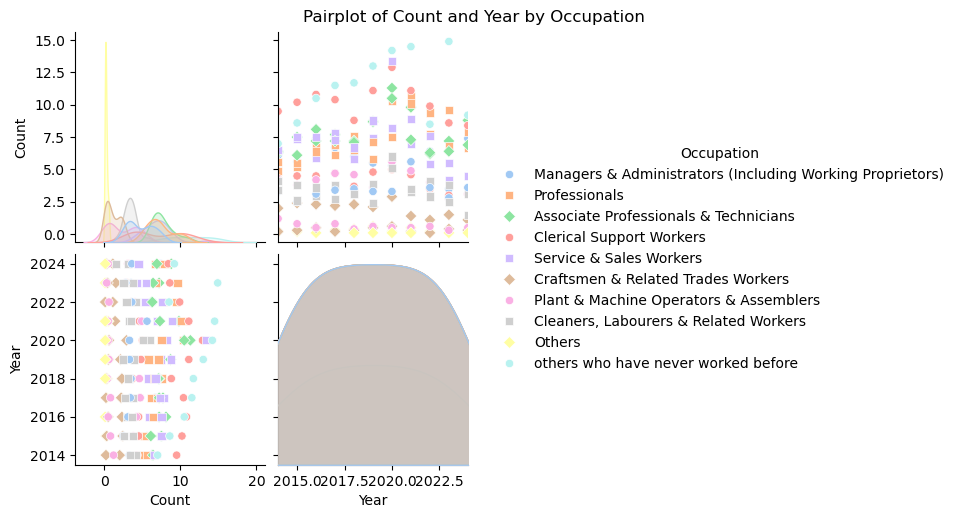

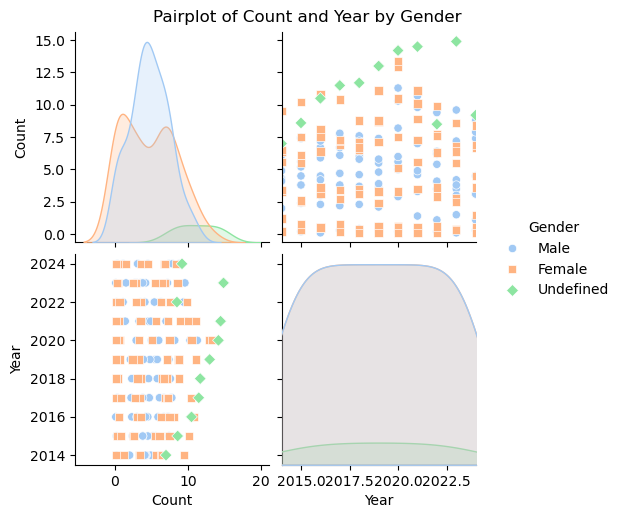

In [64]:
df_long['Year'] = pd.to_numeric(df_long['Year'])

print(cat_list)
for col in cat_list:
    sns.pairplot(df_long, 
                vars=['Count', 'Year'],  
                hue=col,    # This will color points 
                palette='pastel',
                markers=["o", "s", "D"]) 
    
    plt.xlim(2014, 2024)  # Set x-axis limit from 2014 to 2024
    
    plt.suptitle(f"Pairplot of Count and Year by {col}", y=1.02)
    plt.show()


[('Occupation', 'Gender')]
Year                                         Occupation     Gender  2014  \
0                 Associate Professionals & Technicians     Female   6.4   
1                 Associate Professionals & Technicians       Male   6.3   
2                 Cleaners, Labourers & Related Workers     Female   3.4   
3                 Cleaners, Labourers & Related Workers       Male   4.1   
4                              Clerical Support Workers     Female   9.5   
5                              Clerical Support Workers       Male   4.3   
6                    Craftsmen & Related Trades Workers     Female   0.2   
7                    Craftsmen & Related Trades Workers       Male   2.0   
8     Managers & Administrators (Including Working P...     Female   3.3   
9     Managers & Administrators (Including Working P...       Male   6.1   
10                                               Others     Female   NaN   
11                                               Others      

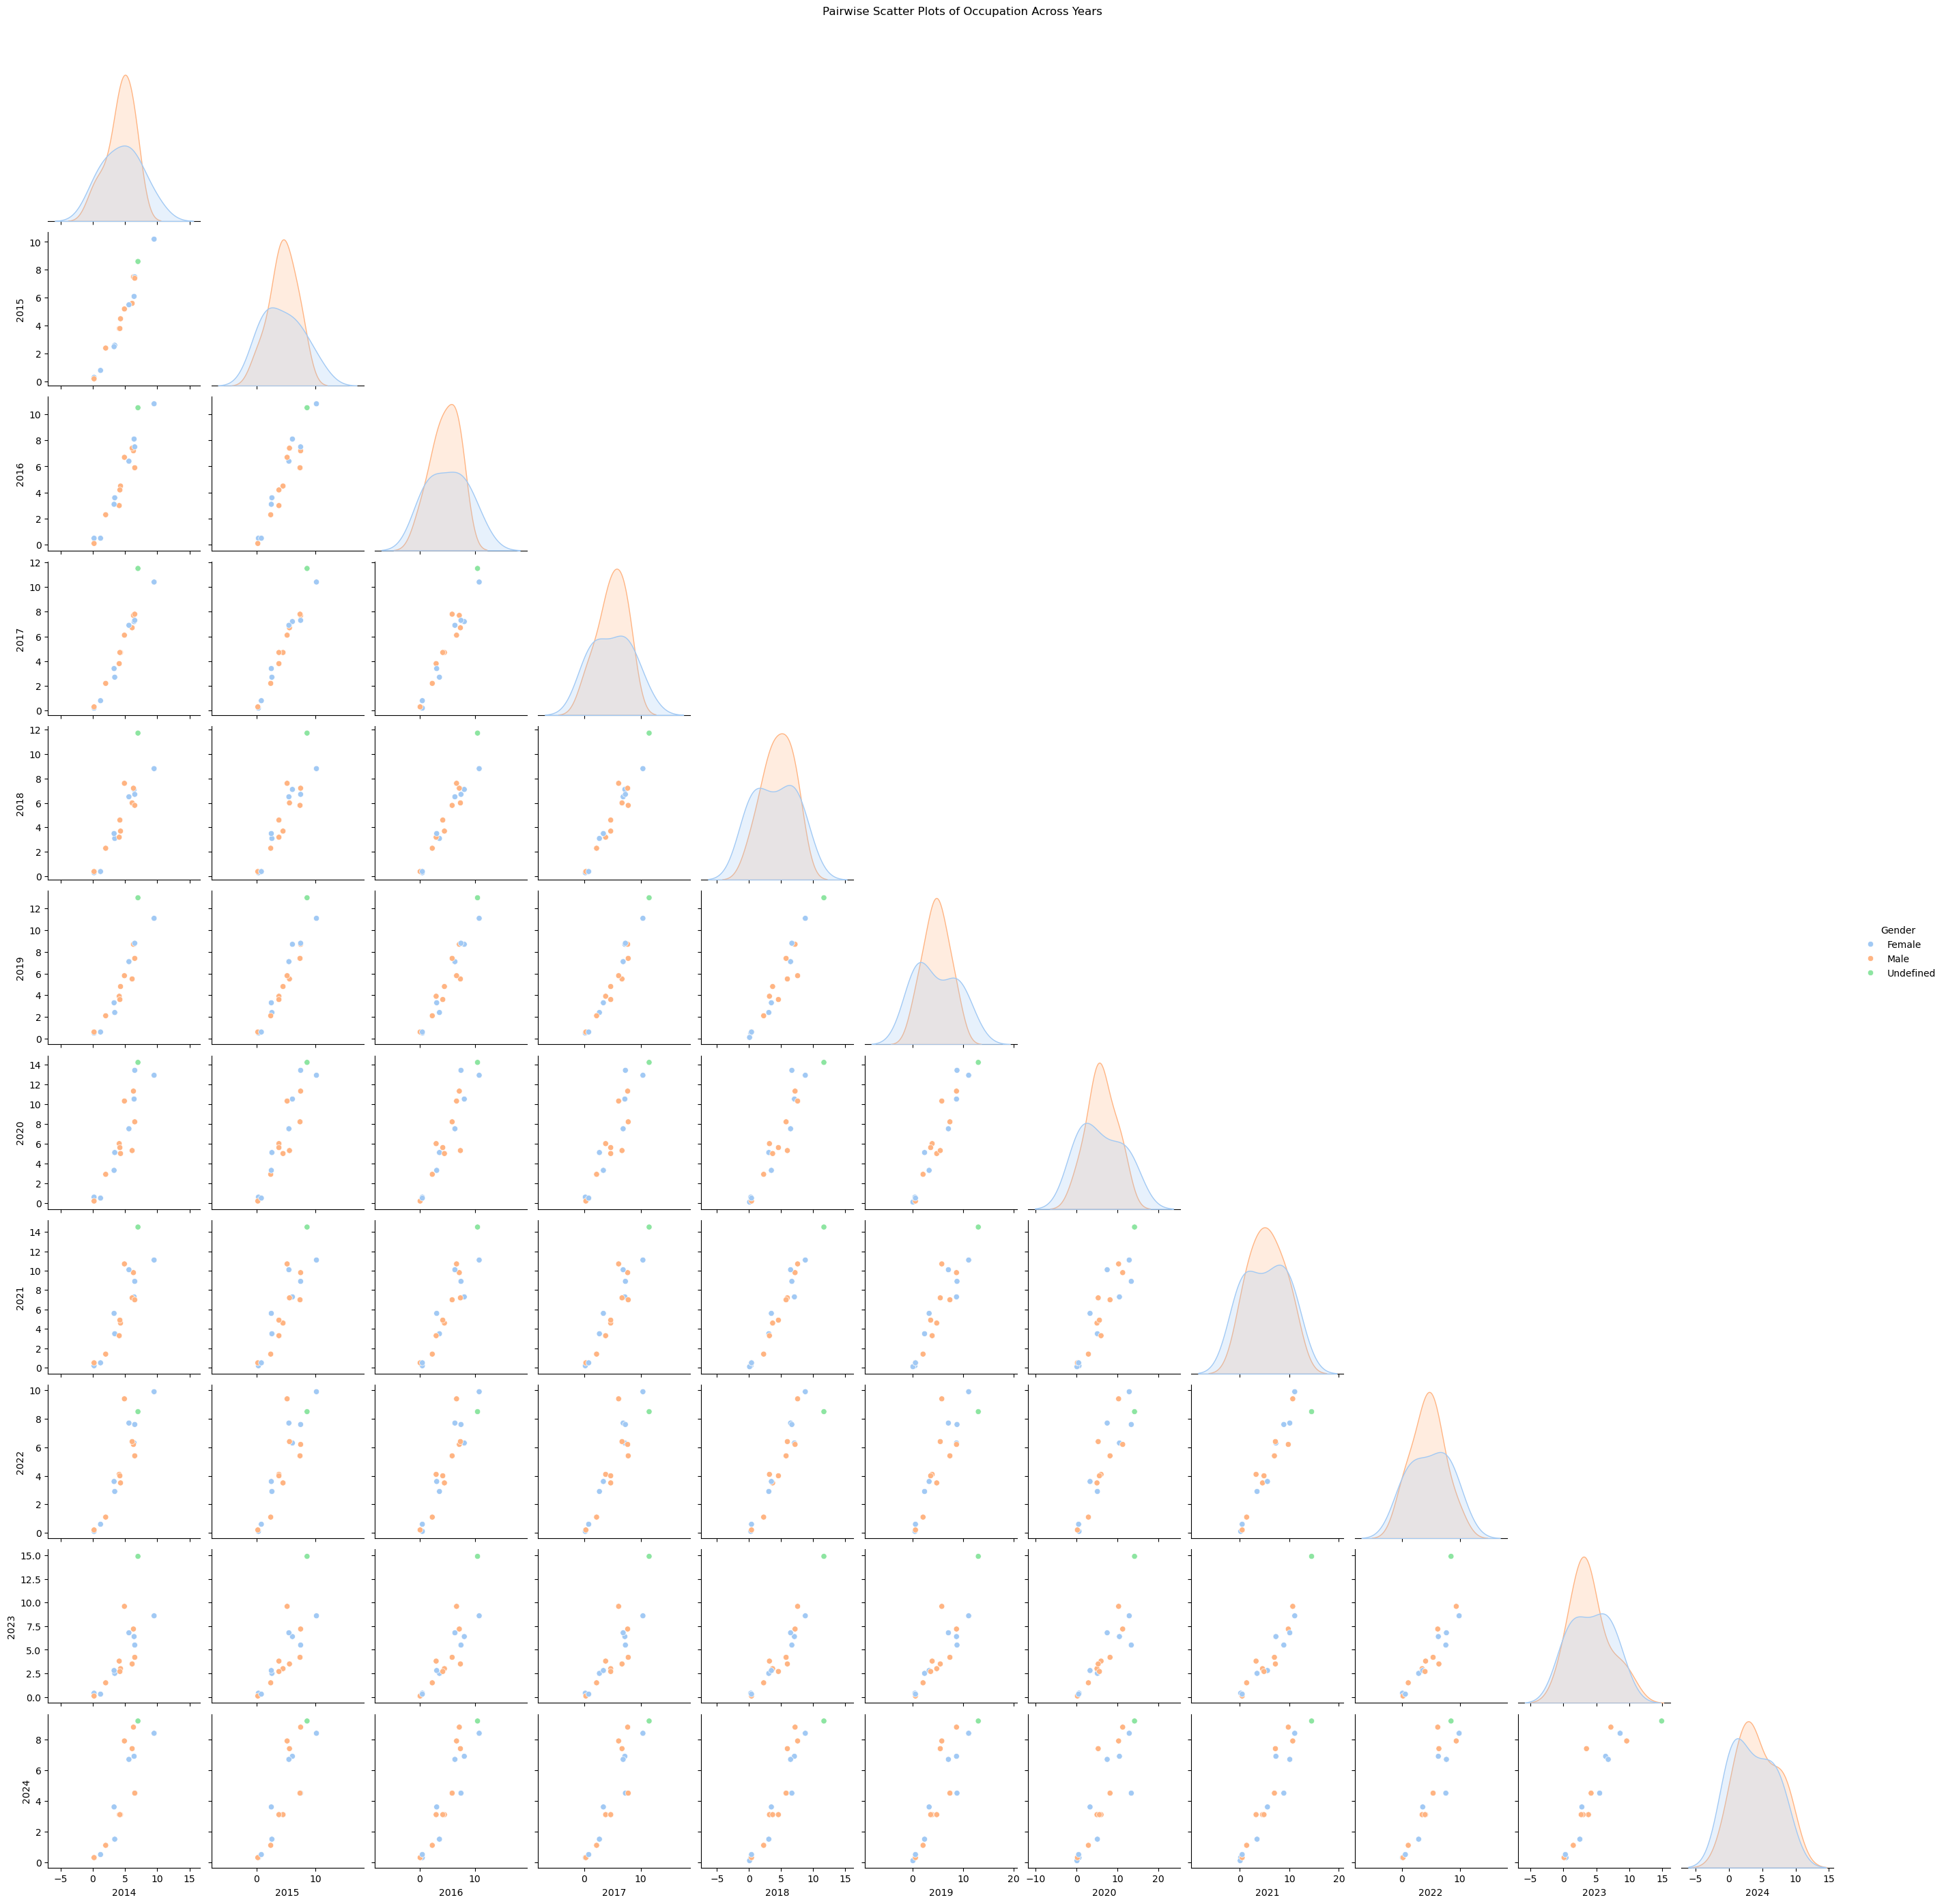

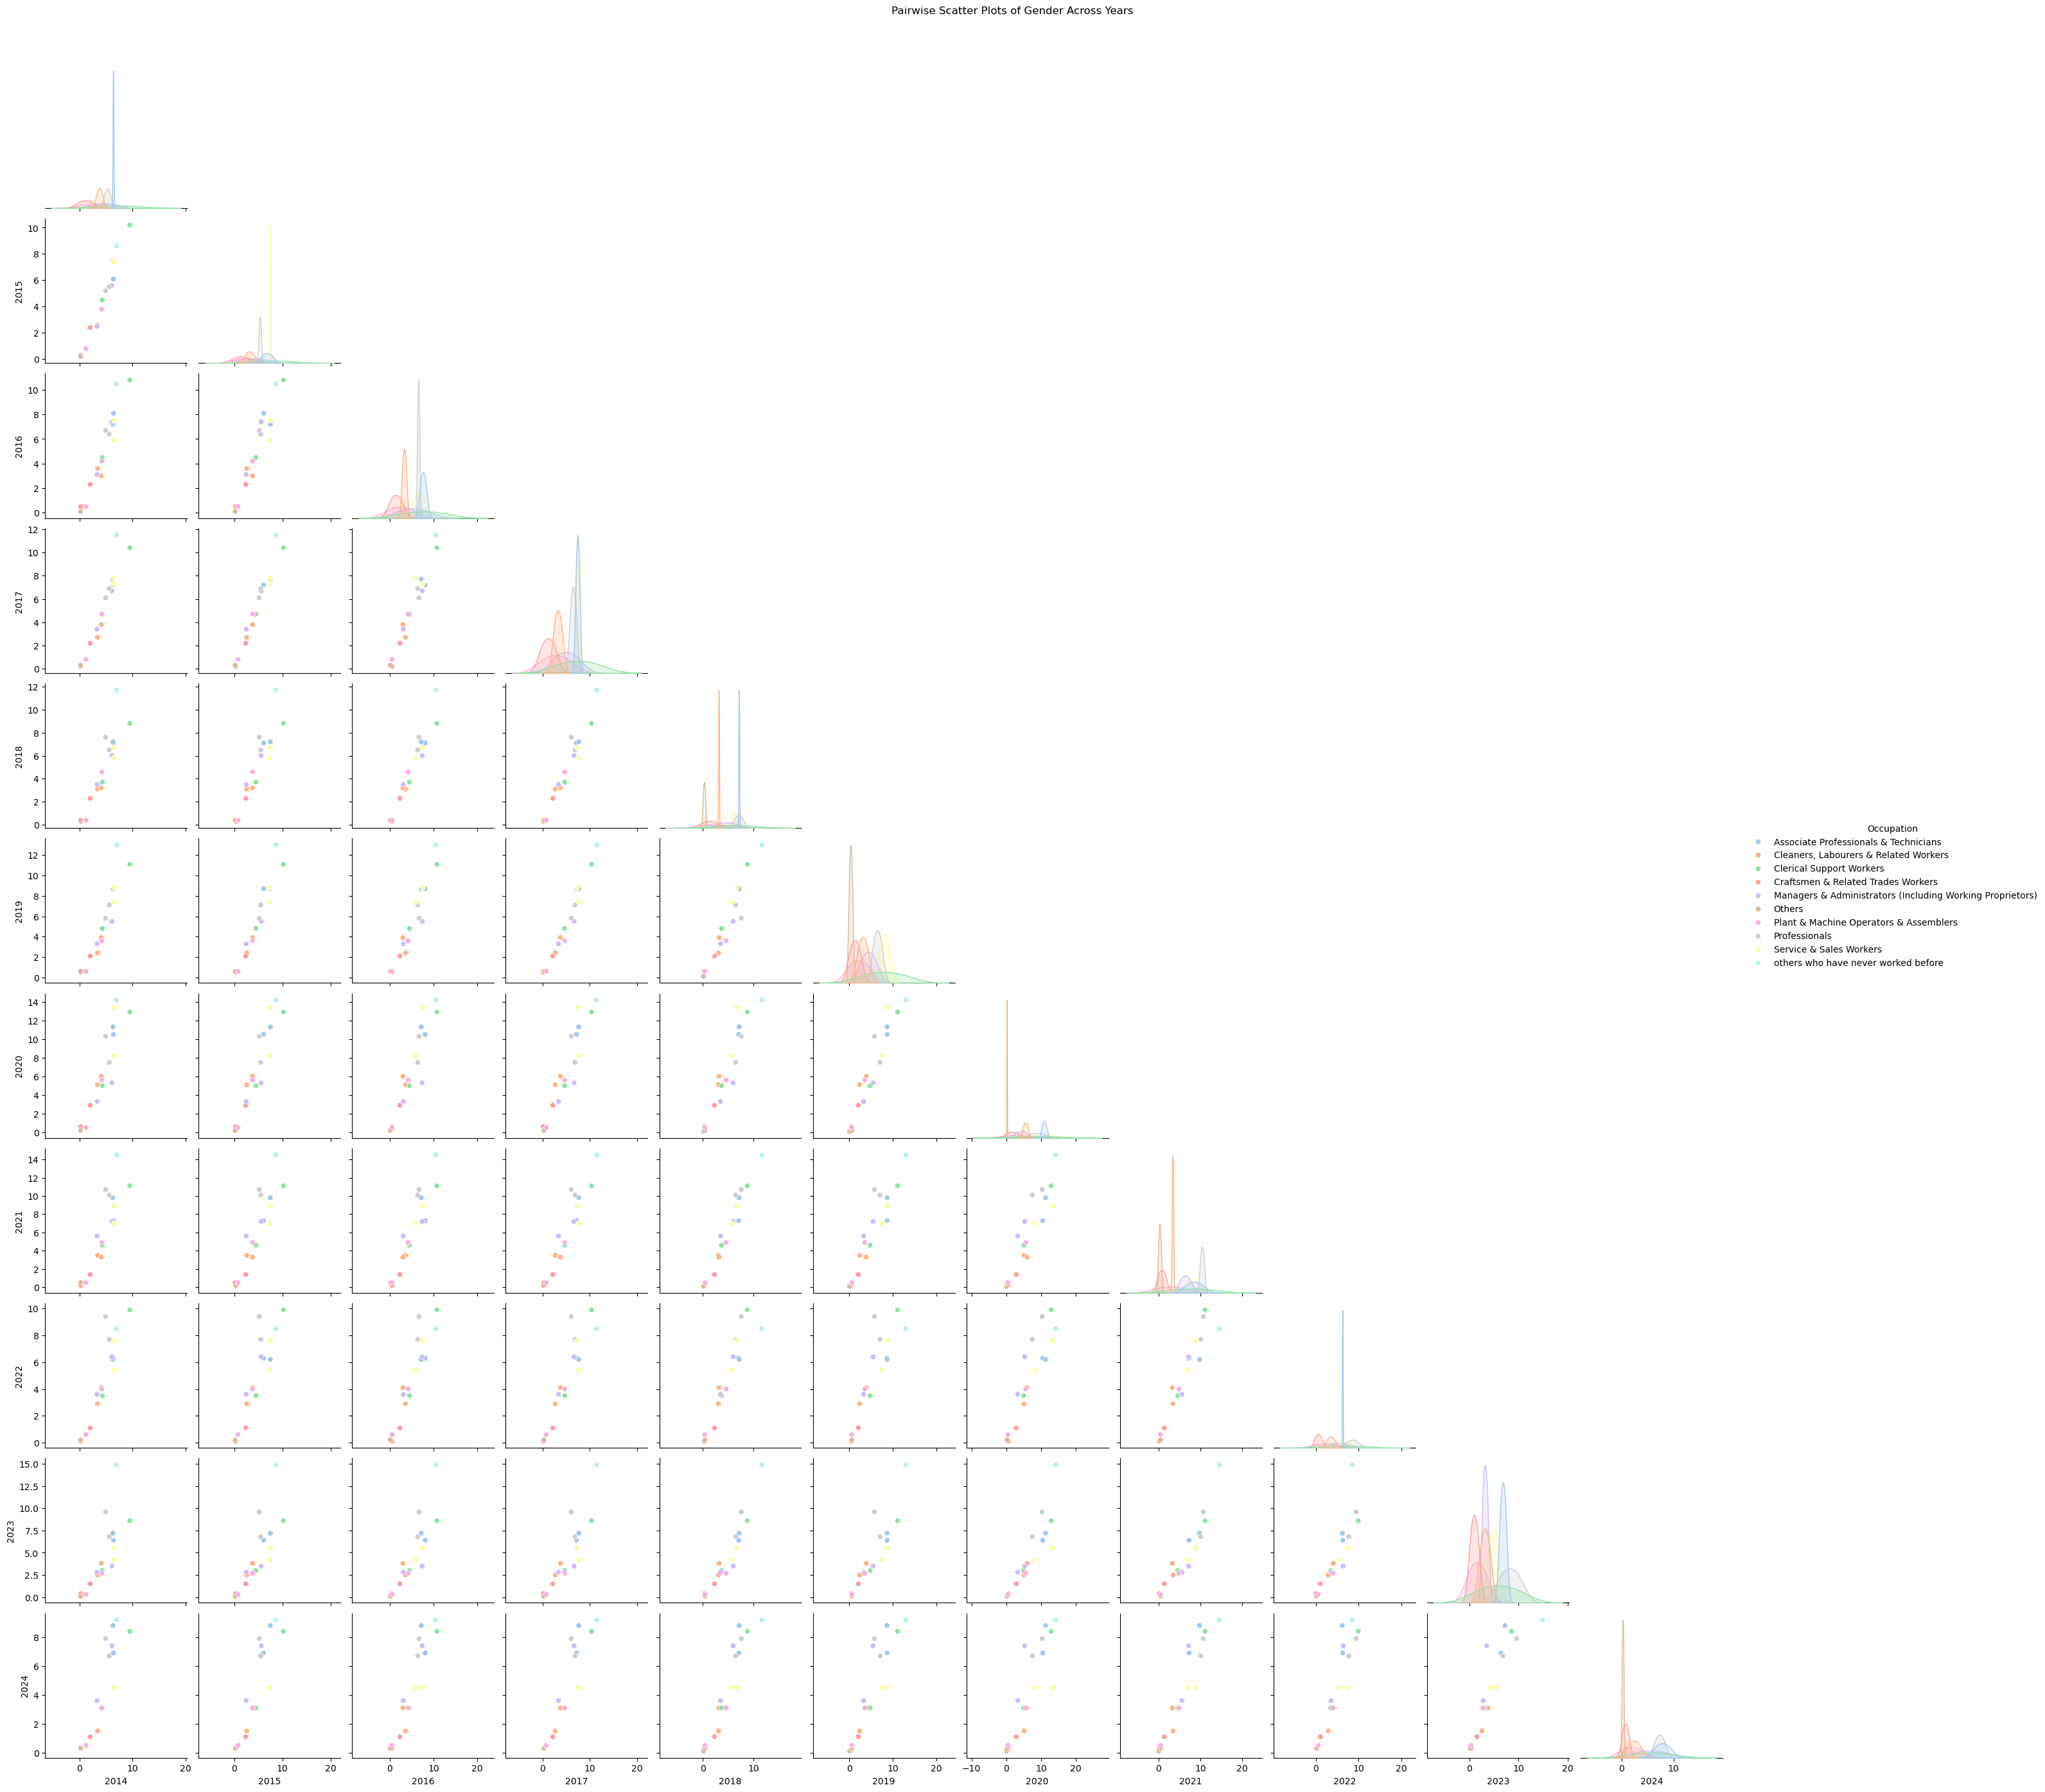

In [86]:
combo_list = list(combinations(cat_list, 2)) 
print(combo_list)

for combo in combo_list:
    
    wide_df = df_long.pivot_table(index=[combo[0],combo[1]], columns="Year", values="Count", aggfunc="mean").reset_index()
    print(wide_df)
    sns.pairplot(wide_df, 
                 hue=combo[1],  
                 palette='pastel',
                 corner=True)  
    plt.suptitle(f"Pairwise Scatter Plots of {combo[0]} Across Years", y=1.02)
    plt.show()

    sns.pairplot(wide_df, 
                 hue=combo[0],  
                 palette='pastel',
                 corner=True)  
    plt.suptitle(f"Pairwise Scatter Plots of {combo[1]} Across Years", y=1.02)
    plt.show()